# 설정

먼저 몇 개의 모듈을 임포트한다. 그림을 저장하는 함수를 준비한다.

In [1]:
# 공통 모듈 임포트
import numpy as np
import os

# 깔끔한 그래프 출력을 위해
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 데이터 가져오기

In [2]:
HEALTH_PATH = "datasets"


def fetch_health_data(health_path=HEALTH_PATH):
    if not os.path.isdir(health_path):
        os.makedirs(health_path)

In [3]:
fetch_health_data()

In [4]:
import pandas as pd

def load_health_data(health_path=HEALTH_PATH):
    csv_path = os.path.join(health_path, "health.zip")
    return pd.read_csv(csv_path)

## 데이터 구조 훑어 보기

In [5]:
health = load_health_data()
health.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [6]:
health["기준년도"].value_counts()

2020    1000000
Name: 기준년도, dtype: int64

In [7]:
health["데이터 공개일자"].value_counts()

2021-12-29    1000000
Name: 데이터 공개일자, dtype: int64

In [8]:
subscriber = health["가입자 일련번호"]
health.drop(["기준년도", "가입자 일련번호", "데이터 공개일자"], axis=1, inplace=True)
health.rename(columns={"연령대 코드(5세단위)": "연령대"}, inplace=True)
health["연령대"] = health["연령대"] * 5 // 10 * 10
health["성별코드"].value_counts()

1    510689
2    489311
Name: 성별코드, dtype: int64

In [9]:
health["연령대"].value_counts()

50    319870
60    297185
70    160367
40    156277
80     60064
90      6237
Name: 연령대, dtype: int64

In [10]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 28 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   시도코드        1000000 non-null  int64  
 1   성별코드        1000000 non-null  int64  
 2   연령대         1000000 non-null  int64  
 3   신장(5Cm단위)   1000000 non-null  int64  
 4   체중(5Kg 단위)  1000000 non-null  int64  
 5   허리둘레        999892 non-null   float64
 6   시력(좌)       999743 non-null   float64
 7   시력(우)       999748 non-null   float64
 8   청력(좌)       999778 non-null   float64
 9   청력(우)       999770 non-null   float64
 10  수축기 혈압      992468 non-null   float64
 11  이완기 혈압      992466 non-null   float64
 12  식전혈당(공복혈당)  992398 non-null   float64
 13  총 콜레스테롤     402306 non-null   float64
 14  트리글리세라이드    402322 non-null   float64
 15  HDL 콜레스테롤   402315 non-null   float64
 16  LDL 콜레스테롤   394471 non-null   float64
 17  혈색소         992389 non-null   float64
 18  요단백         987859 non-

In [11]:
health["시도코드"].value_counts()

41    247369
11    166231
26     69025
48     68530
28     58345
47     54438
27     48413
44     42582
45     38066
46     38041
43     34009
42     32023
30     30057
29     28532
31     26001
49     11878
36      6460
Name: 시도코드, dtype: int64

In [12]:
health.describe()

,시도코드,성별코드,연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999892.000000,999743.000000,999748.000000,999778.000000,999770.000000,...,987859.000000,992398.000000,992399.000000,992398.000000,992397.000000,999657.000000,999804.000000,1000000.000000,331383.00000,331382.000000
mean,34.047725,1.489311,56.667820,160.964085,63.060790,82.357094,0.933045,0.935036,1.046334,1.044071,...,1.122333,0.851984,27.698337,26.759641,37.778292,1.557421,0.584800,0.331384,0.16859,0.584661
std,12.443883,0.499886,11.360902,9.197899,12.269907,9.622632,0.637453,0.644911,0.218147,0.212804,...,0.493386,0.369630,25.286659,25.835091,51.815871,0.783742,0.492757,0.470711,0.37439,0.589833
min,11.000000,1.000000,40.000000,130.000000,30.000000,5.800000,0.100000,0.100000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,27.000000,1.000000,50.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,1.000000,...,1.000000,0.700000,20.000000,16.000000,16.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,41.000000,1.000000,60.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,1.000000,...,1.000000,0.800000,24.000000,21.000000,24.000000,1.000000,1.000000,0.000000,0.00000,1.000000
75%,44.000000,2.000000,60.000000,170.000000,70.000000,89.000000,1.200000,1.200000,1.000000,1.000000,...,1.000000,1.000000,30.000000,31.000000,40.000000,2.000000,1.000000,1.000000,0.00000,1.000000
max,49.000000,2.000000,90.000000,195.000000,135.000000,999.000000,9.900000,9.900000,3.000000,3.000000,...,6.000000,95.000000,8712.000000,5990.000000,2630.000000,3.000000,1.000000,1.000000,1.00000,2.000000


그림 저장: attribute_histogram_plots


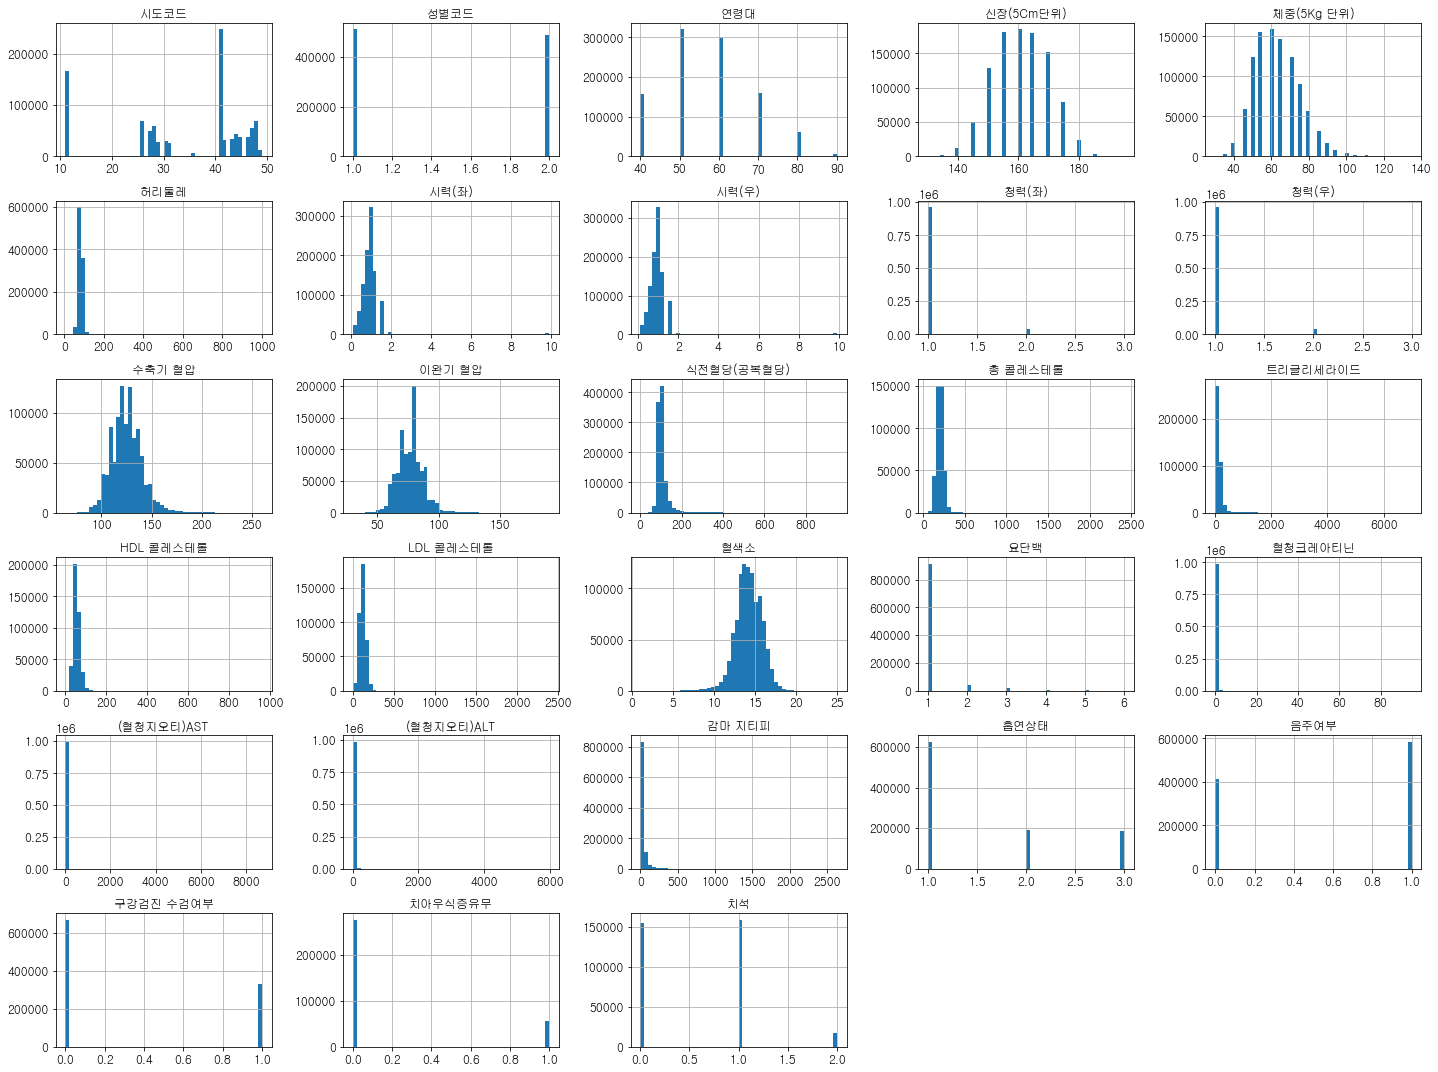

In [13]:
mpl.rcParams["font.family"] = "GULIM"
health.hist(bins=50, figsize=(20, 15))
save_fig("attribute_histogram_plots")

## 테스트 세트 만들기

In [14]:
def test_set_check(identifier):
    return identifier % 10 == 5


def split_train_test_by_id(data, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
housing_with_id = pd.concat([health, subscriber], axis=1)
train_set, test_set = split_train_test_by_id(housing_with_id, "가입자 일련번호")

In [16]:
test_set.head()

,시도코드,성별코드,연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,가입자 일련번호
4,41,2,60,155,50,75.2,1.5,1.2,1.0,1.0,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,5
14,11,2,50,145,50,75.4,0.9,1.0,1.0,1.0,...,0.6,28.0,25.0,18.0,1.0,1.0,0,NaN,NaN,15
24,48,1,70,165,55,76.5,0.8,0.8,2.0,2.0,...,0.9,21.0,12.0,18.0,1.0,0.0,0,NaN,NaN,25
34,28,2,60,150,55,85.0,0.7,0.6,1.0,1.0,...,0.8,26.0,18.0,23.0,1.0,0.0,0,NaN,NaN,35
44,48,1,60,170,75,85.0,0.7,0.8,1.0,1.0,...,0.8,15.0,13.0,18.0,2.0,1.0,1,0.0,1.0,45


In [17]:
train_set = train_set.drop("가입자 일련번호", axis=1)
test_set = test_set.drop("가입자 일련번호", axis=1)

## 상관관계 조사

In [18]:
corr_matrix = health.corr()

In [19]:
corr_matrix["성별코드"].sort_values(ascending=False, key=lambda corr: abs(corr))

성별코드          1.000000
신장(5Cm단위)    -0.720695
혈색소          -0.618036
흡연상태         -0.596244
체중(5Kg 단위)   -0.553887
허리둘레         -0.404275
음주여부         -0.325499
혈청크레아티닌      -0.321725
HDL 콜레스테롤     0.269239
감마 지티피       -0.235968
트리글리세라이드     -0.193679
이완기 혈압       -0.176693
(혈청지오티)ALT   -0.168123
식전혈당(공복혈당)   -0.129612
수축기 혈압       -0.116329
시력(우)        -0.084341
시력(좌)        -0.080349
총 콜레스테롤       0.072455
구강검진 수검여부    -0.068384
(혈청지오티)AST   -0.066353
연령대           0.062235
LDL 콜레스테롤     0.049118
치석           -0.048653
요단백          -0.043821
치아우식증유무      -0.041983
시도코드         -0.019381
청력(좌)        -0.010057
청력(우)        -0.005594
Name: 성별코드, dtype: float64

In [20]:
corr_matrix["연령대"].sort_values(ascending=False, key=lambda corr: abs(corr))

연령대           1.000000
신장(5Cm단위)    -0.355954
음주여부         -0.324966
체중(5Kg 단위)   -0.230002
수축기 혈압        0.223952
청력(좌)         0.215754
청력(우)         0.211396
총 콜레스테롤      -0.173158
흡연상태         -0.156938
혈색소          -0.154652
시력(좌)        -0.151443
시력(우)        -0.144491
LDL 콜레스테롤    -0.143662
식전혈당(공복혈당)    0.113073
구강검진 수검여부    -0.110838
허리둘레          0.094700
치석           -0.082128
HDL 콜레스테롤    -0.074545
치아우식증유무      -0.068398
성별코드          0.062235
(혈청지오티)ALT   -0.059343
트리글리세라이드     -0.055409
감마 지티피       -0.054744
혈청크레아티닌       0.044986
(혈청지오티)AST    0.028767
이완기 혈압       -0.027691
요단백           0.022047
시도코드         -0.002698
Name: 연령대, dtype: float64

그림 저장: scatter_matrix_plot_성별코드


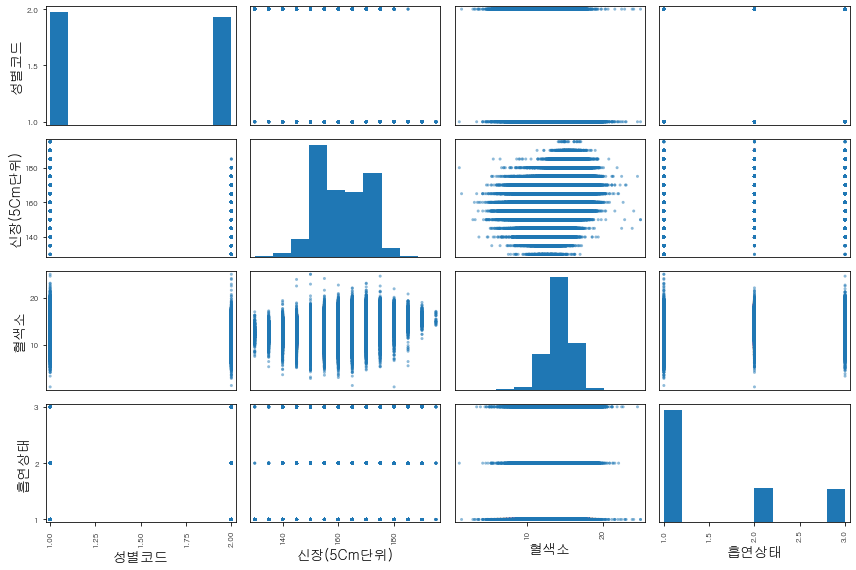

In [21]:
from pandas.plotting import scatter_matrix

attributes = ["성별코드", "신장(5Cm단위)", "혈색소", "흡연상태"]
scatter_matrix(health[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot_성별코드")

그림 저장: scatter_matrix_plot_연령대


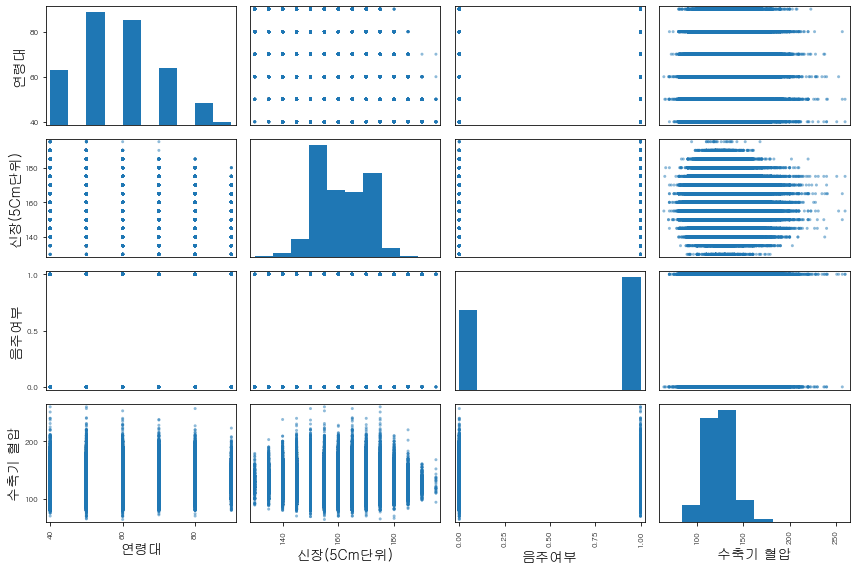

In [22]:
attributes = ["연령대", "신장(5Cm단위)", "음주여부", "수축기 혈압"]
scatter_matrix(health[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot_연령대")

그림 저장: 신장(5Cm단위)_vs_성별코드


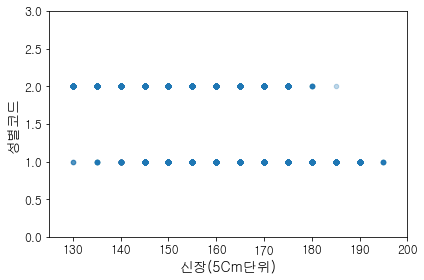

In [23]:
health.plot(kind="scatter", x="신장(5Cm단위)", y="성별코드", alpha=0.1)
plt.axis([125, 200, 0, 3])
save_fig("신장(5Cm단위)_vs_성별코드")

그림 저장: 신장(5Cm단위)_vs_연령대


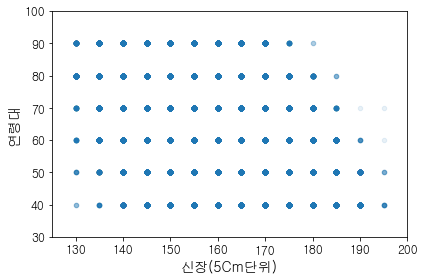

In [24]:
health.plot(kind="scatter", x="신장(5Cm단위)", y="연령대", alpha=0.1)
plt.axis([125, 200, 30, 100])
save_fig("신장(5Cm단위)_vs_연령대")

## 특성 조합으로 실험

In [25]:
health["신장(5Cm단위) per 혈색소"] = health["신장(5Cm단위)"] / health["혈색소"]
health["신장(5Cm단위) per 흡연상태"] = health["신장(5Cm단위)"] / health["흡연상태"]
health["혈색소 per 흡연상태"] = health["혈색소"] / health["흡연상태"]

In [26]:
health["음주여부 per 신장(5Cm단위)"] = health["음주여부"] / health["신장(5Cm단위)"]
health["신장(5Cm단위) per 체중(5Kg 단위)"] = health["신장(5Cm단위)"] / health["체중(5Kg 단위)"]
health["음주여부 per 체중(5Kg 단위)"] = health["음주여부"] / health["체중(5Kg 단위)"]

In [27]:
corr_matrix = health.corr()
corr_matrix["성별코드"].sort_values(ascending=False, key=lambda corr: abs(corr))

성별코드                        1.000000
신장(5Cm단위)                  -0.720695
혈색소                        -0.618036
흡연상태                       -0.596244
신장(5Cm단위) per 흡연상태          0.557166
체중(5Kg 단위)                 -0.553887
혈색소 per 흡연상태                0.487092
신장(5Cm단위) per 체중(5Kg 단위)    0.420972
허리둘레                       -0.404275
음주여부                       -0.325499
혈청크레아티닌                    -0.321725
음주여부 per 신장(5Cm단위)         -0.283052
HDL 콜레스테롤                   0.269239
신장(5Cm단위) per 혈색소           0.250265
감마 지티피                     -0.235968
음주여부 per 체중(5Kg 단위)        -0.196194
트리글리세라이드                   -0.193679
이완기 혈압                     -0.176693
(혈청지오티)ALT                 -0.168123
식전혈당(공복혈당)                 -0.129612
수축기 혈압                     -0.116329
시력(우)                      -0.084341
시력(좌)                      -0.080349
총 콜레스테롤                     0.072455
구강검진 수검여부                  -0.068384
(혈청지오티)AST                 -0.066353
연령대                         0.062235
L

In [28]:
corr_matrix["연령대"].sort_values(ascending=False, key=lambda corr: abs(corr))

연령대                         1.000000
신장(5Cm단위)                  -0.355954
음주여부                       -0.324966
음주여부 per 신장(5Cm단위)         -0.311542
음주여부 per 체중(5Kg 단위)        -0.289250
체중(5Kg 단위)                 -0.230002
수축기 혈압                      0.223952
청력(좌)                       0.215754
청력(우)                       0.211396
총 콜레스테롤                    -0.173158
흡연상태                       -0.156938
혈색소                        -0.154652
시력(좌)                      -0.151443
시력(우)                      -0.144491
LDL 콜레스테롤                  -0.143662
신장(5Cm단위) per 체중(5Kg 단위)    0.130589
식전혈당(공복혈당)                  0.113073
구강검진 수검여부                  -0.110838
혈색소 per 흡연상태                0.108857
허리둘레                        0.094700
신장(5Cm단위) per 흡연상태          0.090094
치석                         -0.082128
HDL 콜레스테롤                  -0.074545
치아우식증유무                    -0.068398
성별코드                        0.062235
(혈청지오티)ALT                 -0.059343
트리글리세라이드                   -0.055409
감

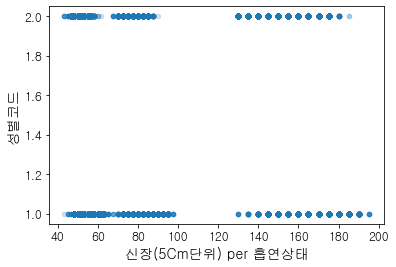

In [29]:
_ = health.plot(kind="scatter", x="신장(5Cm단위) per 흡연상태", y="성별코드", alpha=0.2)

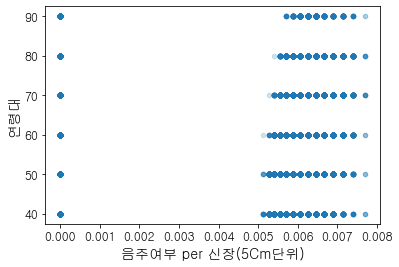

In [30]:
_ = health.plot(kind="scatter", x="음주여부 per 신장(5Cm단위)", y="연령대", alpha=0.2)

In [31]:
health.describe()

,시도코드,성별코드,연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,음주여부,구강검진 수검여부,치아우식증유무,치석,신장(5Cm단위) per 혈색소,신장(5Cm단위) per 흡연상태,혈색소 per 흡연상태,음주여부 per 신장(5Cm단위),신장(5Cm단위) per 체중(5Kg 단위),음주여부 per 체중(5Kg 단위)
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999892.000000,999743.000000,999748.000000,999778.000000,999770.000000,...,999804.000000,1000000.000000,331383.00000,331382.000000,992389.000000,999657.000000,992046.000000,999804.000000,1000000.000000,999804.000000
mean,34.047725,1.489311,56.667820,160.964085,63.060790,82.357094,0.933045,0.935036,1.046334,1.044071,...,0.584800,0.331384,0.16859,0.584661,11.446043,124.628452,10.912840,0.003582,2.629768,0.009220
std,12.443883,0.499886,11.360902,9.197899,12.269907,9.622632,0.637453,0.644911,0.218147,0.212804,...,0.492757,0.470711,0.37439,0.589833,1.270346,43.706239,3.831502,0.003028,0.424675,0.008096
min,11.000000,1.000000,40.000000,130.000000,30.000000,5.800000,0.100000,0.100000,1.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,6.000000,43.333333,0.500000,0.000000,1.153846,0.000000
25%,27.000000,1.000000,50.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,10.689655,82.500000,7.300000,0.000000,2.333333,0.000000
50%,41.000000,1.000000,60.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,1.000000,...,1.000000,0.000000,0.00000,1.000000,11.301370,150.000000,12.600000,0.005714,2.583333,0.012500
75%,44.000000,2.000000,60.000000,170.000000,70.000000,89.000000,1.200000,1.200000,1.000000,1.000000,...,1.000000,1.000000,0.00000,1.000000,12.000000,160.000000,13.900000,0.006250,2.909091,0.015385
max,49.000000,2.000000,90.000000,195.000000,135.000000,999.000000,9.900000,9.900000,3.000000,3.000000,...,1.000000,1.000000,1.00000,2.000000,180.000000,195.000000,25.000000,0.007692,5.666667,0.033333


# 머신러닝 알고리즘을 위한 데이터 준비

In [32]:
health = train_set.drop(["성별코드", "연령대"], axis=1) # 훈련 세트를 위해 레이블 삭제
health_labels = train_set["연령대"].copy()

## 데이터 정제

In [33]:
sample_incomplete_rows = health[health.isnull().any(axis=1)].head()
sample_incomplete_rows

,시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석
0,36,165,60,72.1,1.2,1.5,1.0,1.0,127.0,79.0,...,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN
1,27,150,65,81.0,0.8,0.8,1.0,1.0,110.0,73.0,...,1.0,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN
2,11,155,55,70.0,0.6,0.7,1.0,1.0,123.0,80.0,...,1.0,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN
3,31,160,70,90.8,1.0,1.0,1.0,2.0,134.0,84.0,...,1.0,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0
5,27,185,85,94.0,1.2,1.2,1.0,1.0,114.0,72.0,...,1.0,1.1,25.0,32.0,26.0,3.0,1.0,0,NaN,NaN


In [34]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

중간값이 수치형 특성에서만 계산될 수 있기 때문에 범주형 특성을 삭제한다:

In [35]:
health_num = health.drop("시도코드", axis=1)

In [36]:
imputer.fit(health_num)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([160. ,  60. ,  82. ,   0.9,   0.9,   1. ,   1. , 124. ,  77. ,
        99. , 197. , 110. ,  55. , 114. ,  14.2,   1. ,   0.8,  24. ,
        21. ,  24. ,   1. ,   1. ,   0. ,   0. ,   1. ])

각 특성의 중간 값이 수동으로 계산한 것과 같은지 확인해 본다:

In [38]:
health_num.median().values

array([160. ,  60. ,  82. ,   0.9,   0.9,   1. ,   1. , 124. ,  77. ,
        99. , 197. , 110. ,  55. , 114. ,  14.2,   1. ,   0.8,  24. ,
        21. ,  24. ,   1. ,   1. ,   0. ,   0. ,   1. ])

훈련 세트를 변환한다:

In [39]:
X = imputer.transform(health_num)

In [40]:
health_tr = pd.DataFrame(X, columns=health_num.columns, index=health_num.index)

In [41]:
health_tr.loc[sample_incomplete_rows.index.values]

,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석
0,165.0,60.0,72.1,1.2,1.5,1.0,1.0,127.0,79.0,90.0,...,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0.0,0.0,1.0
1,150.0,65.0,81.0,0.8,0.8,1.0,1.0,110.0,73.0,87.0,...,1.0,0.5,18.0,15.0,15.0,1.0,0.0,0.0,0.0,1.0
2,155.0,55.0,70.0,0.6,0.7,1.0,1.0,123.0,80.0,102.0,...,1.0,0.7,27.0,25.0,7.0,1.0,0.0,0.0,0.0,1.0
3,160.0,70.0,90.8,1.0,1.0,1.0,2.0,134.0,84.0,146.0,...,1.0,1.2,65.0,97.0,72.0,1.0,0.0,1.0,0.0,0.0
5,185.0,85.0,94.0,1.2,1.2,1.0,1.0,114.0,72.0,86.0,...,1.0,1.1,25.0,32.0,26.0,3.0,1.0,0.0,0.0,1.0


In [42]:
imputer.strategy

'median'

In [43]:
health_tr.head()

,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석
0,165.0,60.0,72.1,1.2,1.5,1.0,1.0,127.0,79.0,90.0,...,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0.0,0.0,1.0
1,150.0,65.0,81.0,0.8,0.8,1.0,1.0,110.0,73.0,87.0,...,1.0,0.5,18.0,15.0,15.0,1.0,0.0,0.0,0.0,1.0
2,155.0,55.0,70.0,0.6,0.7,1.0,1.0,123.0,80.0,102.0,...,1.0,0.7,27.0,25.0,7.0,1.0,0.0,0.0,0.0,1.0
3,160.0,70.0,90.8,1.0,1.0,1.0,2.0,134.0,84.0,146.0,...,1.0,1.2,65.0,97.0,72.0,1.0,0.0,1.0,0.0,0.0
5,185.0,85.0,94.0,1.2,1.2,1.0,1.0,114.0,72.0,86.0,...,1.0,1.1,25.0,32.0,26.0,3.0,1.0,0.0,0.0,1.0


## 범주형 특성 다루기

이제 범주형 입력 특성인 `시도코드`을 전처리한다:

In [44]:
health_cat = health[["시도코드"]]
health_cat.head(10)

,시도코드
0,36
1,27
2,11
3,31
5,27
6,44
7,41
8,41
9,48
10,41


In [45]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
health_cat_1hot = cat_encoder.fit_transform(health_cat)
health_cat_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
cat_encoder.categories_

[array([11, 26, 27, 28, 29, 30, 31, 36, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       dtype=int64)]

## 변환기

추가 특성을 위해 사용자 정의 변환기를 만든다:

In [47]:
col_names = "신장(5Cm단위)", "혈색소", "흡연상태", "음주여부", "체중(5Kg 단위)"
# 열 인덱스 구하기
height_ix, hemoglobin_ix, smoking_ix, drinking_ix, weight_ix = [health_num.columns.get_loc(c) for c in col_names]

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        height_per_hemoglobin = X[:, height_ix] / X[:, hemoglobin_ix]
        height_per_smoking = X[:, height_ix] / X[:, smoking_ix]
        hemoglobin_per_smoking = X[:, hemoglobin_ix] / X[:, smoking_ix]
        drinking_per_height = X[:, drinking_ix] / X[:, height_ix]
        height_per_weight = X[:, height_ix] / X[:, weight_ix]
        drinking_per_weight = X[:, drinking_ix] / X[:, weight_ix]
        return np.c_[
            X,
            height_per_hemoglobin,
            height_per_smoking,
            hemoglobin_per_smoking,
            drinking_per_height,
            height_per_weight,
            drinking_per_weight
        ]


attr_adder = CombinedAttributesAdder()
health_extra_attribs = attr_adder.transform(health.to_numpy())

In [49]:
health_extra_attribs = pd.DataFrame(
    health_extra_attribs,
    columns=list(
        health.columns
    ) + [
                "신장(5Cm단위) per 혈색소",
                "신장(5Cm단위) per 흡연상태",
                "혈색소 per 흡연상태",
                "음주여부 per 신장(5Cm단위)",
                "신장(5Cm단위) per 체중(5Kg 단위)",
                "음주여부 per 체중(5Kg 단위)"
            ],
    index=health.index
)
health_extra_attribs.head()

,시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,...,음주여부,구강검진 수검여부,치아우식증유무,치석,신장(5Cm단위) per 혈색소,신장(5Cm단위) per 흡연상태,혈색소 per 흡연상태,음주여부 per 신장(5Cm단위),신장(5Cm단위) per 체중(5Kg 단위),음주여부 per 체중(5Kg 단위)
0,36.0,165.0,60.0,72.1,1.2,1.5,1.0,1.0,127.0,79.0,...,0.0,0.0,NaN,NaN,0.305085,1.714286,5.619048,0.027778,0.218182,0.006061
1,27.0,150.0,65.0,81.0,0.8,0.8,1.0,1.0,110.0,73.0,...,0.0,0.0,NaN,NaN,NaN,1.800000,NaN,0.037037,0.180000,0.006667
2,11.0,155.0,55.0,70.0,0.6,0.7,1.0,1.0,123.0,80.0,...,0.0,0.0,NaN,NaN,NaN,1.571429,NaN,0.090909,0.070968,0.006452
3,31.0,160.0,70.0,90.8,1.0,1.0,1.0,2.0,134.0,84.0,...,0.0,1.0,0.0,0.0,NaN,0.430556,NaN,0.032258,0.193750,0.006250
5,27.0,185.0,85.0,94.0,1.2,1.2,1.0,1.0,114.0,72.0,...,1.0,0.0,NaN,NaN,0.183673,1.038462,5.653846,0.111111,0.145946,0.016216


## 변환 파이프라인

수치형 특성을 전처리하기 위해 파이프라인을 만든다:

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline(
    [
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler())
    ]
)
health_num_tr = num_pipeline.fit_transform(health_num)

In [51]:
health_num_tr

array([[ 0.43873753, -0.24974865, -1.06506601, ..., -1.1830686 ,
         0.28332085, -1.13901033],
       [-1.19203471,  0.15772779, -0.14104678, ..., -1.1830686 ,
        -0.75786288, -1.13901033],
       [-0.64844396, -0.65722508, -1.28309302, ..., -1.1830686 ,
         0.44381953, -1.13901033],
       ...,
       [ 1.52591901,  0.56520423,  0.27424276, ...,  0.70404696,
        -0.3051743 ,  0.62542006],
       [-0.10485322,  0.56520423,  0.89717707, ..., -1.1830686 ,
        -0.80959872, -1.13901033],
       [-0.10485322, -0.65722508, -0.64977647, ..., -1.1830686 ,
         0.65781777, -1.13901033]])

In [52]:
from sklearn.compose import ColumnTransformer

num_attribs = list(health_num)
cat_attribs = ["시도코드"]
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs), ("cat", OneHotEncoder(), cat_attribs)])
health_prepared = full_pipeline.fit_transform(health)

In [53]:
health_prepared

array([[ 0.43873753, -0.24974865, -1.06506601, ...,  0.        ,
         0.        ,  0.        ],
       [-1.19203471,  0.15772779, -0.14104678, ...,  0.        ,
         0.        ,  0.        ],
       [-0.64844396, -0.65722508, -1.28309302, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.52591901,  0.56520423,  0.27424276, ...,  0.        ,
         1.        ,  0.        ],
       [-0.10485322,  0.56520423,  0.89717707, ...,  0.        ,
         1.        ,  0.        ],
       [-0.10485322, -0.65722508, -0.64977647, ...,  0.        ,
         0.        ,  0.        ]])

In [54]:
health_prepared.shape

(900000, 48)

# 모델 선택과 훈련 (연령대)

## 훈련 세트에서 훈련하고 평가하기

In [55]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(health_prepared, health_labels)

LinearRegression()

In [56]:
# 훈련 샘플 몇 개를 사용해 전체 파이프라인을 적용해 본다
some_data = health.iloc[:5]
some_labels = health_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("예측:", lin_reg.predict(some_data_prepared))

예측: [51.66992188 55.11230469 55.94384766 63.74023438 46.23193359]


실제 값과 비교한다:

In [57]:
print("레이블:", list(some_labels))

레이블: [40, 60, 60, 60, 40]


In [58]:
some_data_prepared

array([[ 0.43873753, -0.24974865, -1.06506601,  0.41910213,  0.8797714 ,
        -0.21248929, -0.20721959,  0.14803395,  0.21952678, -0.56073916,
        -0.34808841, -0.95403592,  0.21781408,  0.13312317,  0.51088588,
        -0.24647726,  0.66844615, -0.27776057,  0.01095382, -0.32286298,
        -0.71102298, -1.18703208, -0.70412841, -0.2433768 ,  0.35112088,
        -0.34758444,  0.92343681,  1.06415303, -1.1830686 ,  0.28332085,
        -1.13901033,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-1.19203471,  0.15772779, -0.14104678, -0.2087115 , -0.20969281,
        -0.21248929, -0.20721959, -1.00866794, -0.38340252, -0.67905323,
        -0.02089209, -0.14867348, -0.06764714, -0.02867374, -0.97422746,
        -0.24647726, -0.946865  , -0.402869  , -0.45232119, -0.43896734,
   

In [59]:
from sklearn.metrics import mean_squared_error

health_predictions = lin_reg.predict(health_prepared)
lin_rmse = mean_squared_error(health_labels, health_predictions, squared=False)
lin_rmse

8.65720792045081

In [60]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(health_labels, health_predictions)
lin_mae

6.861540587565104

In [61]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(health_prepared, health_labels)

DecisionTreeRegressor()

In [62]:
print("예측:", tree_reg.predict(some_data_prepared))

예측: [40. 60. 60. 60. 40.]


In [63]:
health_predictions = tree_reg.predict(health_prepared)
tree_rmse = mean_squared_error(health_labels, health_predictions, squared=False)
tree_rmse

0.019720265943665386

In [64]:
tree_mae = mean_absolute_error(health_labels, health_predictions)
tree_mae

5.555555555555556e-05

In [65]:
import joblib
from sklearn.ensemble import RandomForestRegressor

os.makedirs("pkl", exist_ok=True)
try:
    forest_reg = joblib.load("pkl/RFR.pkl")
except FileNotFoundError:
    forest_reg = RandomForestRegressor(verbose=2)
    forest_reg.fit(health_prepared, health_labels)
    joblib.dump(forest_reg, "pkl/RFR.pkl")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


KeyboardInterrupt: 

In [ ]:
print("예측:", forest_reg.predict(some_data_prepared))

In [ ]:
health_predictions = forest_reg.predict(health_prepared)
forest_rmse = mean_squared_error(health_labels, health_predictions, squared=False)
forest_rmse

In [ ]:
forest_mae = mean_absolute_error(health_labels, health_predictions)
forest_mae

In [ ]:
from sklearn.svm import SVR

try:
    svm_reg = joblib.load("pkl/SVR.pkl")
except FileNotFoundError:
    svm_reg = SVR(kernel="linear", verbose=True)
    svm_reg.fit(health_prepared[:100000], health_labels[:100000])
    joblib.dump(svm_reg, "pkl/SVR.pkl")

In [ ]:
print("예측:", svm_reg.predict(some_data_prepared))

In [ ]:
try:
    health_predictions = joblib.load("pkl/SVR_P.pkl")
except FileNotFoundError:
    health_predictions = svm_reg.predict(health_prepared[:100000])
    joblib.dump(health_predictions, "pkl/SVR_P.pkl")
svm_rmse = mean_squared_error(health_labels[:100000], health_predictions, squared=False)
svm_rmse

In [ ]:
svm_mae = mean_absolute_error(health_labels[:100000], health_predictions)
svm_mae

## 교차 검증을 사용한 평가

In [ ]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(
    lin_reg,
    health_prepared,
    health_labels,
    scoring="neg_mean_squared_error",
    cv=10,
    verbose=2
)
lin_rmse_scores = np.sqrt(-lin_scores)

In [ ]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())


display_scores(lin_rmse_scores)

In [ ]:
try:
    scores = joblib.load("pkl/DTR_CVS.pkl")
except FileNotFoundError:
    scores = cross_val_score(
        tree_reg,
        health_prepared,
        health_labels,
        scoring="neg_mean_squared_error",
        cv=10,
        verbose=2)
    joblib.dump(scores, "pkl/DTR_CVS.pkl")
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

In [ ]:
try:
    forest_scores = joblib.load("pkl/RFR_CVS.pkl")
except FileNotFoundError:
    forest_scores = cross_val_score(
        forest_reg,
        health_prepared[:100000],
        health_labels[:100000],
        scoring="neg_mean_squared_error",
        cv=10,
        verbose=2
    )
    joblib.dump(forest_scores, "pkl/RFR_CVS.pkl")
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

In [ ]:
try:
    svr_cvs = joblib.load("pkl/SVR_CVS.pkl")
except FileNotFoundError:
    svr_cvs = cross_val_score(
        svm_reg,
        health_prepared[:10000],
        health_labels[:10000],
        scoring="neg_mean_squared_error",
        cv=10,
        verbose=2
    )
    joblib.dump(svr_cvs, "pkl/SVR_CVS.pkl")
svr_rmse_cvs = np.sqrt(-svr_cvs)
display_scores(svr_rmse_cvs)

In [ ]:
pd.Series(np.sqrt(-lin_scores)).describe()

In [ ]:
pd.Series(np.sqrt(-scores)).describe()

In [ ]:
pd.Series(np.sqrt(-forest_scores)).describe()

In [ ]:
pd.Series(np.sqrt(-svr_cvs)).describe()

# 모델 세부 튜닝 (연령대)

## 그리드 탐색

In [ ]:
from sklearn.model_selection import GridSearchCV

try:
    grid_search = joblib.load("pkl/GSCV.pkl")
except FileNotFoundError:
    param_grid = [
        # 12(=3×4)개의 하이퍼파라미터 조합을 시도한다.
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도한다.
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
    ]
    forest_reg = RandomForestRegressor(verbose=2)
    # 다섯 개의 폴드로 훈련하면 총 (12+6)*5=90번의 훈련이 일어난다.
    grid_search = GridSearchCV(
        forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=2
    )
    grid_search.fit(health_prepared, health_labels)
    joblib.dump(grid_search, "pkl/GSCV.pkl")

최상의 파라미터 조합은 다음과 같다:

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

그리드서치에서 테스트한 하이퍼파라미터 조합의 점수를 확인한다:

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

## 랜덤 탐색

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

try:
    rnd_search = joblib.load("pkl/RSCV.pkl")
except FileNotFoundError:
    param_distribs = {'n_estimators': randint(low=1, high=200), 'max_features': randint(low=1, high=8)}
    forest_reg = RandomForestRegressor(verbose=2)
    rnd_search = RandomizedSearchCV(
        forest_reg, param_distributions=param_distribs, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=2
    )
    rnd_search.fit(health_prepared[:100000], health_labels[:100000])
    joblib.dump(rnd_search, "pkl/RSCV.pkl")

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

## 최상의 모델과 오차 분석

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
extra_attribs = [
    "신장(5Cm단위) per 혈색소",
    "신장(5Cm단위) per 흡연상태",
    "혈색소 per 흡연상태",
    "음주여부 per 신장(5Cm단위)",
    "신장(5Cm단위) per 체중(5Kg 단위)",
    "음주여부 per 체중(5Kg 단위)"
]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

## 테스트 세트로 시스템 평가하기

In [ ]:
final_model = grid_search.best_estimator_
X_test = test_set.drop(["성별코드", "연령대"], axis=1)
y_test = test_set["연령대"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)

In [ ]:
final_rmse

테스트 RMSE에 대한 95% 신뢰 구간을 계산할 수 있다:

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(
    stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors))
)

또는 t-점수 대신 z-점수를 사용할 수도 있습니다:

In [ ]:
m = len(squared_errors)
mean = squared_errors.mean()

In [ ]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

# 이진 분류기 훈련 (성별코드)

In [ ]:
X, y = health_prepared, train_set["성별코드"].to_numpy()

In [ ]:
some_health = X[0]
some_health

In [ ]:
y[0]

In [ ]:
X_train, X_test, y_train, y_test = X, X_test_prepared, y, test_set["성별코드"].to_numpy()

In [ ]:
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(verbose=2)
sgd_clf.fit(X_train, y_train_2)

In [ ]:
sgd_clf.predict([some_health])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train_2, cv=3, scoring="accuracy", verbose=2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

try:
    forest_clf = joblib.load("pkl/RFC")
except FileNotFoundError:
    forest_clf = RandomForestClassifier(verbose=2)
    forest_clf.fit(X_train, y_train_2)
    joblib.dump(forest_clf, "pkl/RFC")

In [ ]:
forest_clf.predict([some_health])

In [ ]:
try:
    rfc_cvs = joblib.load("pkl/RFC_CVS")
except FileNotFoundError:
    rfc_cvs = cross_val_score(forest_clf, X_train, y_train_2, cv=3, scoring="accuracy", verbose=2)
    joblib.dump(rfc_cvs, "pkl/RFC_CVS")
rfc_cvs

# 성능 측정 (성별코드)

## 교차 검증을 사용한 정확도 측정

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True)
for train_index, test_index in skfolds.split(X_train, y_train_2):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_2[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_2[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

In [ ]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_2, cv=3, scoring="accuracy", verbose=2)

In [ ]:
try:
    skf_rfc_a = joblib.load("pkl/SKF_RFC_A")
except FileNotFoundError:
    skf_rfc_a = []
    for train_index, test_index in skfolds.split(X_train, y_train_2):
        clone_clf = clone(forest_clf)
        X_train_folds = X_train[train_index]
        y_train_folds = y_train_2[train_index]
        X_test_fold = X_train[test_index]
        y_test_fold = y_train_2[test_index]
        clone_clf.fit(X_train_folds, y_train_folds)
        y_pred = clone_clf.predict(X_test_fold)
        n_correct = sum(y_pred == y_test_fold)
        skf_rfc_a.append(n_correct / len(y_pred))
    joblib.dump(skf_rfc_a, "pkl/SKF_RFC_A")
skf_rfc_a

## 오차 행렬

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3, verbose=2)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_2, y_train_pred)

In [ ]:
y_train_perfect_predictions = y_train_2  # 완벽한 경우
confusion_matrix(y_train_2, y_train_perfect_predictions)

In [ ]:
rfc_cvp = cross_val_predict(forest_clf, X_train, y_train_2, cv=3, verbose=2)

## 정밀도와 재현율

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_2, y_train_pred)

In [ ]:
recall_score(y_train_2, y_train_pred)

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_2, y_train_pred)

## ROC 곡선

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3, method="decision_function", verbose=2)

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_2, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # 대각 점선
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)


plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_2, y_scores)